Loading data from: ../results/features_validation_set.csv
Validation data loaded successfully!

Value counts for GCS classes:
gcs_class
3    371
5    264
2    115
Name: count, dtype: int64

Feature data shape: (750, 3)
Label data shape: (750,)

--- Training Decision Tree Classifier ---
Training complete.

--- Classifier Performance on Validation Set (Decision Tree) ---
Classification Report:
              precision    recall  f1-score   support

       GCS 2       0.57      0.96      0.71       115
       GCS 3       0.82      0.66      0.73       371
     GCS 4/5       0.71      0.69      0.70       264

    accuracy                           0.72       750
   macro avg       0.70      0.77      0.72       750
weighted avg       0.74      0.72      0.72       750


Overall Accuracy: 71.73%

Confusion Matrix:


/tmp/ipykernel_68300/1871662675.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['perplexity'].fillna(100000, inplace=True)


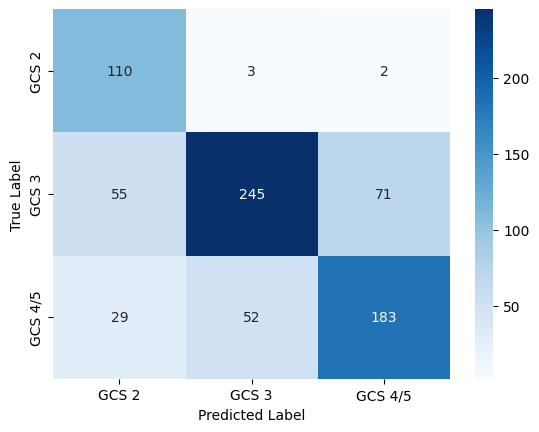


--- Visualized Decision Tree ---


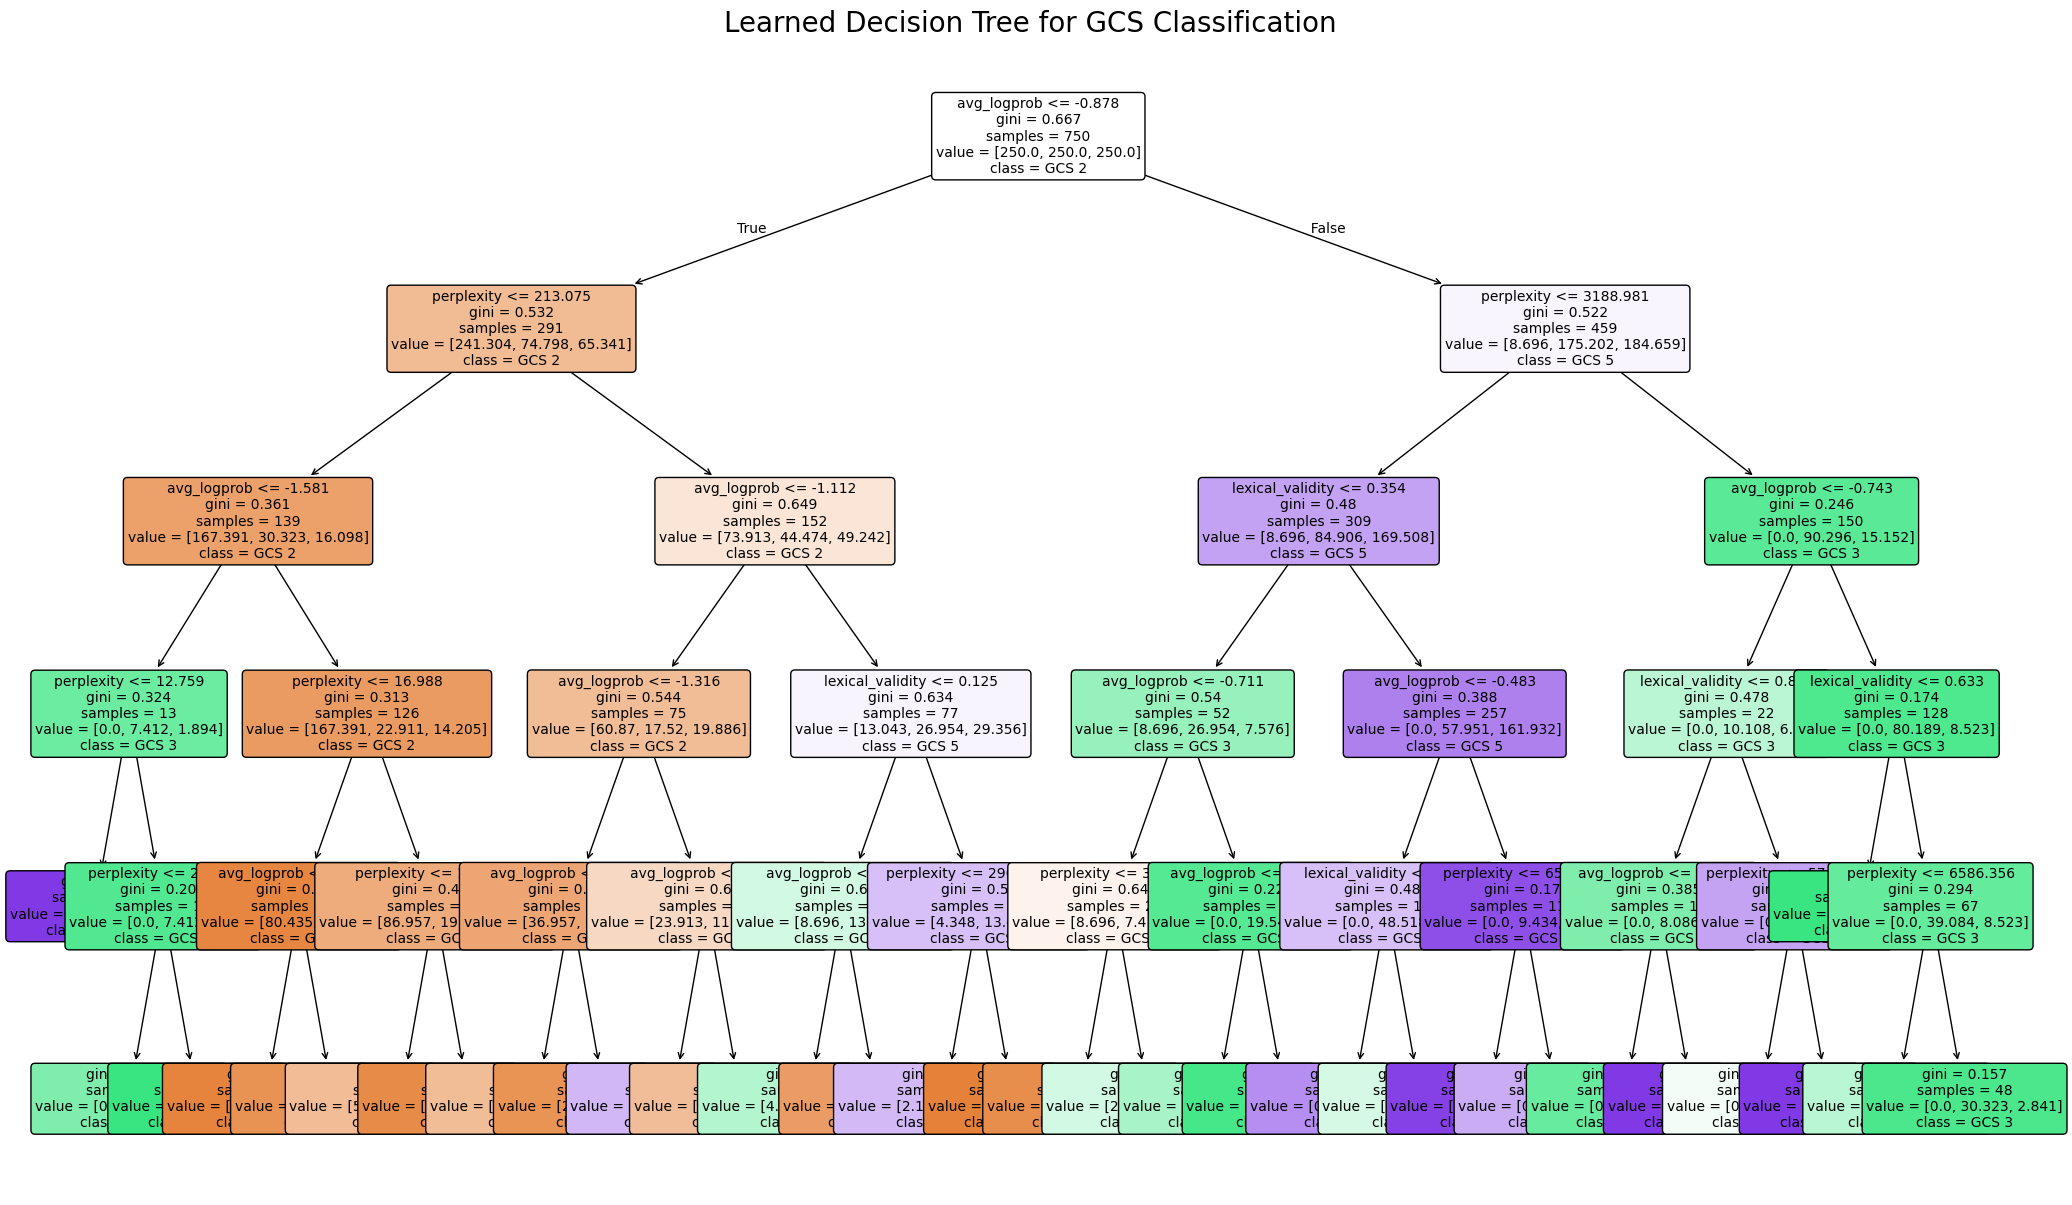

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split 
import os

# --- Step 1: Load the Data ---
project_root = ".." 
results_dir = os.path.join(project_root, "results")
validation_csv_path = os.path.join(results_dir, "features_validation_set.csv")

print(f"Loading data from: {validation_csv_path}")
df_val = pd.read_csv(validation_csv_path)
print("Validation data loaded successfully!")

# Prepare the data
def get_gcs_class(category):
    if category == 'gcs_2': return 2
    if category == 'gcs_3': return 3
    if category == 'gcs_45_clean': return 5
    return 0 

df_val['gcs_class'] = df_val['category'].apply(get_gcs_class)
df_clean = df_val[df_val['gcs_class'] != 0].copy()

# Very high perplexity is effectively infinity, so filling with a large number 
df_clean['perplexity'].fillna(100000, inplace=True)
# Fill any other potential NaNs with the column's median value.
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

print("\nValue counts for GCS classes:")
print(df_clean['gcs_class'].value_counts())

# --- Step 2: Define Features (X) and Labels (y) ---
feature_columns = ['avg_logprob', 'lexical_validity', 'perplexity']
X = df_clean[feature_columns]
y = df_clean['gcs_class']

print("\nFeature data shape:", X.shape)
print("Label data shape:", y.shape)


# --- Step 3: Train the Decision Tree Classifier ---
print("\n--- Training Decision Tree Classifier ---")

dt_classifier = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)

dt_classifier.fit(X, y)
print("Training complete.")


# --- Step 4: Evaluate the Trained Model on the Validation Data ---
# Get predictions from the trained model
predicted_labels = dt_classifier.predict(X)

print("\n--- Classifier Performance on Validation Set (Decision Tree) ---")

report_labels = [2, 3, 5]
report_target_names = ['GCS 2', 'GCS 3', 'GCS 4/5']

print("Classification Report:")
print(classification_report(y, predicted_labels, 
                            labels=report_labels, 
                            target_names=report_target_names,
                            zero_division=0))

print(f"\nOverall Accuracy: {accuracy_score(y, predicted_labels):.2%}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y, predicted_labels, labels=[2, 3, 5])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=report_target_names,
            yticklabels=report_target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# --- Step 5: Visualize the Decision Tree ---
print("\n--- Visualized Decision Tree ---")
plt.figure(figsize=(25, 15))
plot_tree(dt_classifier, 
          feature_names=feature_columns, 
          class_names=['GCS 2', 'GCS 3', 'GCS 5'], 
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Learned Decision Tree for GCS Classification", fontsize=20)
plt.show()